# Linear Regression

# Let's start with Single variable model

In [80]:
import pandas as pd
import numpy as np
import sklearn 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [53]:
#Let's read the input file
data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [54]:
data.shape

(1599, 12)

In [55]:
#This dataset contains 11 features and 1 required output(i.e., quality)
#Now for single Linear regression model let's consider only one feature viz., density

In [56]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [57]:
#There are no missing values in the dataset. Hence we can proceed with the model
X=data['density'].values
m=len(X)
X=X.reshape((m,1)) #This is required for a single variable model since the input variable X must be of the shape (m,1)

In [58]:
y = data['quality'].values

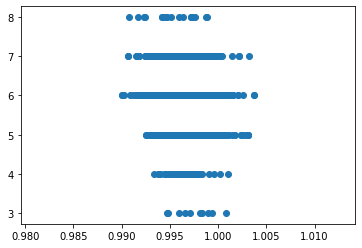

In [59]:
#Now Let's visualize X and y to get a better understanding
plt.scatter(X,y)

In [60]:
#Okay 0_o 

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
#Okay so our model is succesfully trained on the training dataset.
#Let's now see the slope of the line and the y-intercept of the line obtained

In [64]:
model.coef_[0]

-81.0818314797307

In [65]:
model.intercept_

86.47418659890222

In [66]:
#Hence, the line formed is y = (-81.081831)*x+86.4741

In [67]:
#Let us see the model score with trained data
model.score(X_train, y_train)

0.0362331950270649

In [68]:
#This is a very low value. This is because the value of density alone may not have such a huge impact on the quality

In [69]:
#Lets now predict y values on x_test and see how the model works
y_pred=model.predict(X_test)

In [70]:
#Lets see the score on tested data
model.score(X_test, y_test)

0.008273971886024412

In [71]:
#Again a very low value
#We need to plot the predictions now
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,5,5.505870
1,6,5.608033
2,6,5.635601
3,6,5.749115
4,6,5.998847
...,...,...
475,6,5.737764
476,6,5.747494
477,5,5.651817
478,6,5.751548


In [72]:
#Okay our model does a pretty good job at predicting the values for quality based on density alone.
#(P.S. Adding more features will improve the overall score of the model and decreases the error.
#We will see that when we consider multiple features for Linear regression

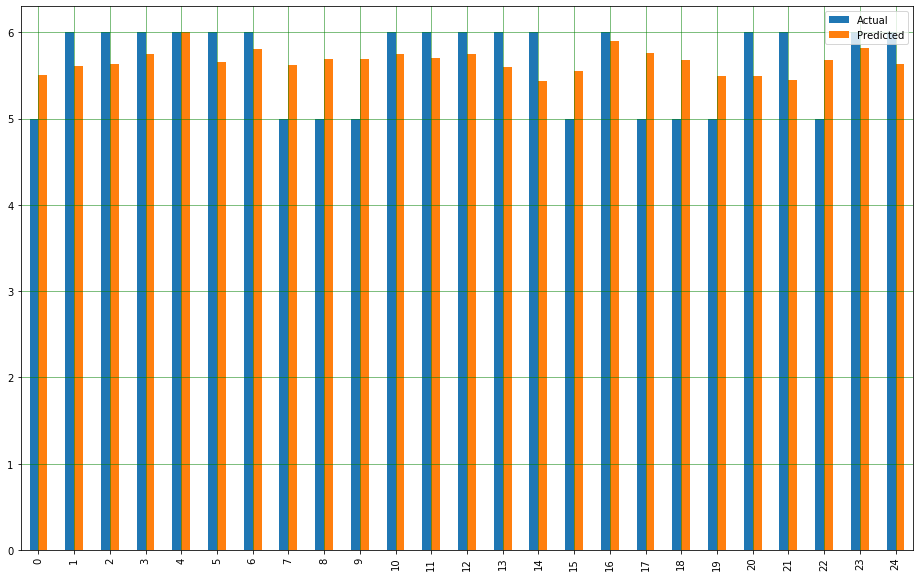

In [73]:
#Let's plot a bar graph to demonstrate the model. 
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

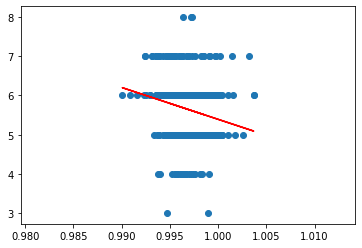

In [74]:
#There is no significant difference between the predicted values and actual values for our model
plt.scatter(X_test,y_test)
plt.plot(X_test, y_pred,  color = 'red')
plt.show()

In [75]:
#Honestly this density alone cannot give the relation for the variation in the quality 

In [79]:
#Here are all the metrics of the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.6475276509790856
Mean Squared Error: 0.603605610453346
Root Mean Squared Error: 0.7769205946899246


# Let us now move into multi variable regression model

In [81]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [82]:
#This is our dataset but now the variable X will have numerous features and y(quality) is to be predicted

In [84]:
X=data.drop(['quality'] , axis =1)

In [85]:
X.head() #Quality is dropped now

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [86]:
y = data['quality']

In [87]:
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [88]:
#Great! let's now split the data into test and training 

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [90]:
model = LinearRegression()

In [91]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
fixed acidity,0.045853
volatile acidity,-1.176403
citric acid,-0.287778
residual sugar,0.016492
chlorides,-1.806362
free sulfur dioxide,0.006071
total sulfur dioxide,-0.003779
density,-32.615524
pH,-0.375065
sulphates,0.887110


In [93]:
#These are all the co-efficients of the features for the hypothesis equation

In [95]:
#Let's now predict the values on testing data
y_pred = model.predict(X_test)

In [97]:
model.intercept_ #printing intercept before I forget

36.546937444627744

In [99]:
#Now as done in single variable model, let's make a dataframe containing y_test and y_pred
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
75,5,5.540966
1283,6,5.369896
408,6,6.105059
1281,6,5.741933
1118,6,6.704468
1143,6,5.992845
1215,6,6.219458
181,5,5.060425
1186,5,5.764348
1252,5,5.161107


In [100]:
#Okay now the predictions are more closer to the actual values
#To quantify, let's check the scores of the model
model.score(X_train, y_train)

0.3732759065136656

In [104]:
model.score(X_test, y_test)

0.3186005776026677

In [105]:
model.score(X_test, y_pred)

1.0

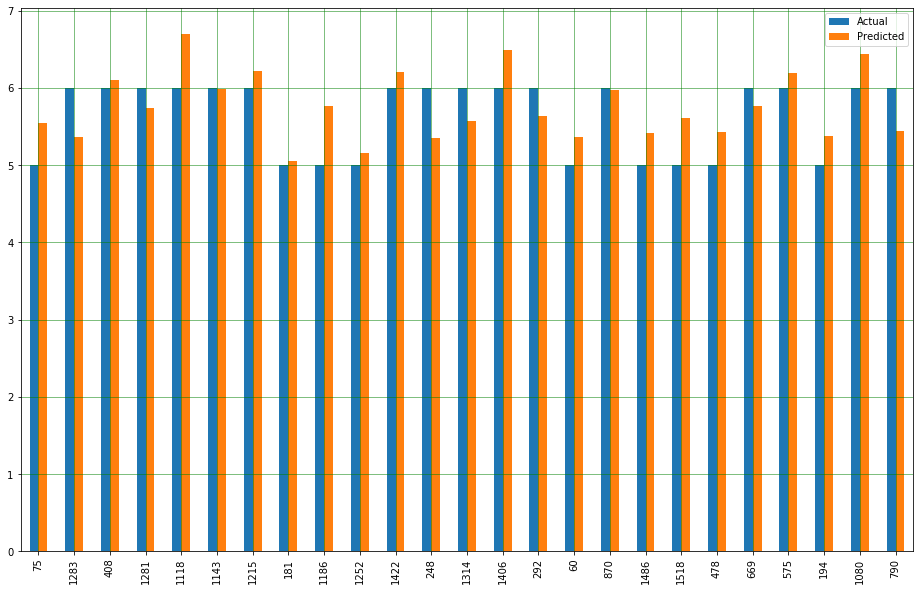

In [101]:
#37% of the relation is being properly explained by out regression model
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [106]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.49692250656277476
Mean Squared Error: 0.4147279618151055
Root Mean Squared Error: 0.6439937591429792


In [108]:
data.mean()

fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [ ]:
#The mean of the input dataset is 5.6 and our root mean square error is 0.64 which represents that our model is quite good. 
#Done XD